# WeatherPy
----

### Analysis
* As expected, the weather becomes **significantly warmer as one approaches the equator** (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is **no strong relationship between latitude and cloudiness**. However, it is interesting to see that a strong band of cities sits at 0, 75, and 90% cloudiness.
* There is **no strong relationship between latitude and wind speed**. However, it seems like there are a flurry of cities farther away from the equator that experience higher wind speeds (above 25mph).
* There is **no strong relationship between the latitude and humidity**. However, it is interesting to see a higher concentration of cities with higher humidity in the northern hemisphere. However, this is likely due to the existence of a larger total number of cities in the northern hemisphere compared the southern hemisphere.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sb

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
#import sys
#!{sys.executable} -m pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Prepare city and weather lists to store results
city_list = []
country_list = []
lat_list = []
lon_list = []
date_list = []
temp_list = []
humidity_list = []
cloud_list = []
wind_list = []
set_count = 1
record_count = 1
request_count = 0

# Loop through cities list for weather data
print("Beginning Data Retrieval\n-----------------------------")
for city in cities:
    
    # Build query URL and request results in Farenheit
    #city = 'Toronto'
    url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_keys.api_key}&q={city}&units=imperial"
    
    # Make request and store response
    try:
        response = requests.get(url)
        request_count += 1
    except OSError:
        time.sleep(3)
        response = requests.get(url)
        request_count += 1
        
    # Get weather data
    data = response.json()
    if data['cod'] == '404':
        print("City not found. Skipping...")
        continue
    else:
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    city_list.append(city)
    lat_list.append(data['coord']['lat'])
    lon_list.append(data['coord']['lon'])
    country_list.append(data['sys']['country'])
    date_list.append(data['dt'])
    temp_list.append(data['main']['temp_max'])
    humidity_list.append(data['main']['humidity'])
    cloud_list.append(data['clouds']['all'])
    wind_list.append(data['wind']['speed'])
    
    record_count += 1
    if record_count > 50:
        
        # Update set count
        set_count += 1
        
        # Reset record_count to 1
        record_count = 1
    
    if request_count%60 == 0:
        
        # Sleep for one minute (max 60 calls per minute)
        time.sleep(60)

print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | tecoanapa
Processing Record 3 of Set 1 | khatanga
City not found. Skipping...
Processing Record 4 of Set 1 | muisne
Processing Record 5 of Set 1 | dikson
City not found. Skipping...
Processing Record 6 of Set 1 | caravelas
Processing Record 7 of Set 1 | nouadhibou
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | rikitea
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | kununurra
Processing Record 16 of Set 1 | dingle
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | port moresby
Processing Record 21 o

Processing Record 31 of Set 4 | lebu
Processing Record 32 of Set 4 | makakilo city
Processing Record 33 of Set 4 | dubrovnik
Processing Record 34 of Set 4 | nantucket
Processing Record 35 of Set 4 | angoram
Processing Record 36 of Set 4 | fethiye
Processing Record 37 of Set 4 | tokmak
Processing Record 38 of Set 4 | saldanha
Processing Record 39 of Set 4 | tigil
Processing Record 40 of Set 4 | alta floresta
Processing Record 41 of Set 4 | samarai
Processing Record 42 of Set 4 | carnarvon
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | ginir
Processing Record 45 of Set 4 | massaguet
Processing Record 46 of Set 4 | avera
Processing Record 47 of Set 4 | lorengau
Processing Record 48 of Set 4 | podgorodnyaya pokrovka
Processing Record 49 of Set 4 | awbari
Processing Record 50 of Set 4 | meulaboh
Processing Record 1 of Set 5 | puerto ayora
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | ostrovnoy
Processing Record 4 of Set 5 | ivanteyevka
Pro

Processing Record 19 of Set 8 | anzio
City not found. Skipping...
Processing Record 20 of Set 8 | esperanza
Processing Record 21 of Set 8 | ruangwa
Processing Record 22 of Set 8 | hailar
Processing Record 23 of Set 8 | krechevitsy
Processing Record 24 of Set 8 | santa maria
Processing Record 25 of Set 8 | pilar
Processing Record 26 of Set 8 | pumiao
Processing Record 27 of Set 8 | vysokopillya
Processing Record 28 of Set 8 | sorland
Processing Record 29 of Set 8 | pechenga
Processing Record 30 of Set 8 | punta cardon
Processing Record 31 of Set 8 | saint-pierre
Processing Record 32 of Set 8 | vetluga
Processing Record 33 of Set 8 | batemans bay
Processing Record 34 of Set 8 | la asuncion
Processing Record 35 of Set 8 | griffith
Processing Record 36 of Set 8 | takaka
City not found. Skipping...
Processing Record 37 of Set 8 | isangel
Processing Record 38 of Set 8 | usinsk
Processing Record 39 of Set 8 | roebourne
Processing Record 40 of Set 8 | poplar bluff
Processing Record 41 of Set 8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Store list data into a dataframe
city_data_df = pd.DataFrame({'City': city_list,
                             'Cloudiness': cloud_list,
                             'Country': country_list,
                             'Date': date_list,
                             'Humidity': humidity_list,
                             'Lat': lat_list,
                             'Lon': lon_list,
                             'Max Temp': temp_list,    
                             'Wind Speed': wind_list})

# Check that there are at least 500 records
city_data_df.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lon           548
Max Temp      548
Wind Speed    548
dtype: int64

In [5]:
# Export the city data into a .csv
city_data_df.to_csv('city_data.csv', encoding='utf-8', index=False)

# Preview the dataframe
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,butaritari,56,KI,1542738366,100,3.07,172.79,82.28,6.20
1,tecoanapa,5,MX,1542736080,62,16.99,-99.26,87.80,4.70
2,khatanga,80,RU,1542738366,81,71.98,102.47,-1.83,9.33
3,muisne,20,EC,1542738367,63,0.61,-80.02,86.60,8.48
4,dikson,48,RU,1542738367,94,73.51,80.55,4.57,12.35


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

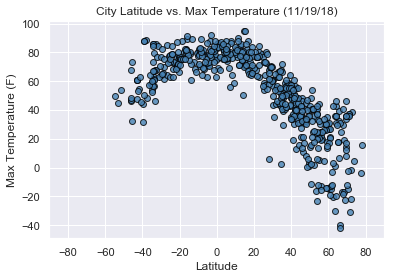

In [17]:
# Create, show, and save a scatter plot
sb.set()
plt.scatter(lat_list, temp_list, edgecolors = 'black', facecolors = 'steelblue', alpha = 0.8)
plt.title('City Latitude vs. Max Temperature (11/19/18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlim(-90,90)
plt.savefig("City Latitude vs. Max Temperature (11.19.18).png", dpi=199)
plt.show()

#### Latitude vs. Humidity Plot

In [18]:
# Remove potentially erroneous data like Chazuta's humidity of 290%
paired_dict = zip(lat_list, humidity_list)
cleaned_list = [[lat, humidity] for lat, humidity in paired_dict if humidity <= 100]
lat_list2, humidity_list2 = list(zip(*cleaned_list))

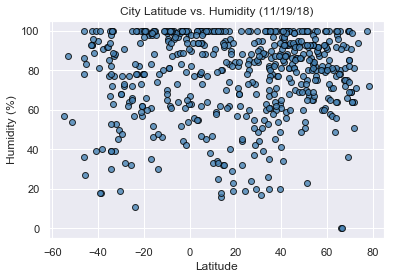

In [19]:
# Create, show, and save a scatter plot
plt.scatter(lat_list2, humidity_list2, edgecolors = 'black', facecolors = 'steelblue', alpha = 0.8)
plt.title('City Latitude vs. Humidity (11/19/18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('City Latitude vs. Humidity (11.19.18).png', dpi=199)
plt.show()

#### Latitude vs. Cloudiness Plot

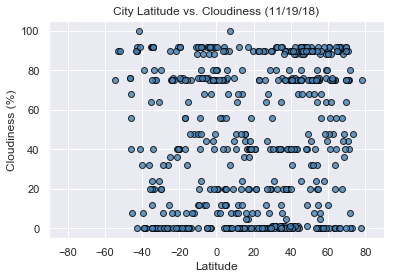

In [20]:
# Create, show, and save a scatter plot
plt.scatter(lat_list, cloud_list, edgecolors = 'black', facecolors = 'steelblue', alpha = 0.8)
plt.title('City Latitude vs. Cloudiness (11/19/18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(-90,90)
plt.savefig('City Latitude vs. Cloudiness (11.19.18).png', dpi=199)
plt.show()

#### Latitude vs. Wind Speed Plot

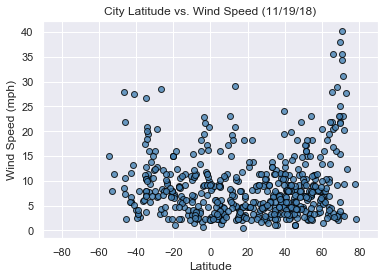

In [21]:
# Create, show, and save a scatter plot
plt.scatter(lat_list, wind_list, edgecolors = 'black', facecolors = 'steelblue', alpha = 0.8)
plt.title('City Latitude vs. Wind Speed (11/19/18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim(-90,90)
plt.savefig('City Latitude vs. Wind Speed (11.19.18).png', dpi=199)
plt.show()

Number of cities in the northern hemisphere: 382
Number of cities in the southern hemisphere: 166
Number of cities east of the Prime Meridian: 338
Number of cities west of the Prime Meridian: 210


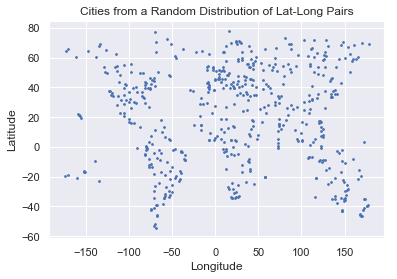

In [22]:
# Check random distribution of lat-lng pairs
float_lats = city_data_df['Lat']
float_lons = city_data_df['Lon']
print("Number of cities in the northern hemisphere:", len(float_lats[float_lats>0]))
print("Number of cities in the southern hemisphere:", len(float_lats[float_lats<0]))
print("Number of cities east of the Prime Meridian:", len(float_lons[float_lons>0]))
print("Number of cities west of the Prime Meridian:", len(float_lons[float_lons<0]))
plt.scatter(float_lons, float_lats, s = 3)
plt.title('Cities from a Random Distribution of Lat-Long Pairs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()